# Project: Investigate NoShowAppointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up


> This is a dataset that looks to explore and inform what criteria predicts if a patient would show up for a scheduled appointment.
some questions this analysis aims to answer are:

```
what is the proportion of patient that showed up for their appointment to those who dont show up?
What is the proportion of Gender with regards to showing up for appointment?
The highest number of Neighborhood with respect to showing up for appointment or not?
The least number of Neighborhood with respect to showing up for appointment or not
Which Neighborhood has the highest number of patients?
Which Neighborhood has the least number of patients?
What day of the week do patient Schedule appointment the most?
What day of the week do patient have appointment the most?
what is the relationship between the day a patient schedules an appointment and showing up for appointment or not?
what is the relationship between the day a patient has an appointment and showing up for it or not?
which day do people who don't show up for appointment have an appointment
which day do people who show up for appointment have an appointment
which day do patient who don't show up for appointment scheduled the appointment?
which day do patient who show up for appointment scheduled the appointment?
Is there any relationship between patients who are enrolled in Brasilian welfare program "Bolsa Família" and Showing up for appointment?
What age group has the highest number of patient?
What age group has the highest number of patient that do not show up for appointment?
What age group has the highest number of patient that show up for appointment?
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#loading the dataset

data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#Taking look at the first-five rows of the dataset

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Taking look at the bottom-five rows of the dataset

data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#Taking a look at some summary information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> ### it was noticed from the above output that there are no missing entries in the data set, hence there is no need to drop any column yet

In [6]:
#checking for the summary statistics of the dataset

data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset looks okay except for the minimal value for age being -1 which is not possible since there is no negative age
Hence, we have to drop the row(s) with the age value as -1

In [7]:
#since there cant be negative age, we drop the corresponding row with age == -1

data.drop(data[data['Age'] == -1].index, inplace=True)

# since there are no missing entries, let us take a look at the number of unique elements in all columns

In [8]:
#printing out the number of unique elements in selected columns

columns = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

for cols in columns:
    print('number of unique element in ' , cols, ' is: ', data[cols].nunique())

number of unique element in  PatientId  is:  62298
number of unique element in  AppointmentID  is:  110526
number of unique element in  Gender  is:  2
number of unique element in  ScheduledDay  is:  103548
number of unique element in  AppointmentDay  is:  27
number of unique element in  Age  is:  103
number of unique element in  Neighbourhood  is:  81
number of unique element in  Scholarship  is:  2
number of unique element in  Hipertension  is:  2
number of unique element in  Diabetes  is:  2
number of unique element in  Alcoholism  is:  2
number of unique element in  Handcap  is:  5
number of unique element in  SMS_received  is:  2
number of unique element in  No-show  is:  2




> from the number of unique elements in __PatientId__ columns, it could mean that there are duplicated rows since _PatientId_ is meant to be unique per patient. Hence, we cannot ascertain our claim till we check if actually there are duplicated rows/entries

> The appointmentDay column having only __27__ unique values definitely indicates that lot of patients had same appointment day

> Also we can see that there are only __81__ unique Neighbourhood in the whole dataset



In [9]:
#Checking for duplicated entries

sum(data.duplicated())

0

> ### we could see from the above result that there are no duplicated rows in the dataset, hence there is no need to drop any row

In [10]:
#viewing the unique elements in the selected columns

columns = ['Gender', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

for cols in columns:
    print('unique elements in ' , cols, ' are: ', list(data[cols].unique()))

unique elements in  Gender  are:  ['F', 'M']
unique elements in  Scholarship  are:  [0, 1]
unique elements in  Hipertension  are:  [1, 0]
unique elements in  Diabetes  are:  [0, 1]
unique elements in  Alcoholism  are:  [0, 1]
unique elements in  Handcap  are:  [0, 1, 2, 3, 4]
unique elements in  SMS_received  are:  [0, 1]
unique elements in  No-show  are:  ['No', 'Yes']


In [11]:
#Taking a look at the datatype of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


> We could notice that the 'AppointmentDay' and 'ScheduledDay' are of Object datatype instead of the datatime timestamp, hence there is a need to convert it to the suitable datatype

In [12]:
#converting the AppointmentDay column to datetime datatype

data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [13]:
#converting the ScheduledDay column to datetime datatype

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

In [14]:
#checking if the change has been effected

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Extracting the date from the AppointmentDay column

data['AppointmentDate'] = data['AppointmentDay'].dt.date

In [16]:
#Extracting the date from the ScheduledDay column

data['Schedule_Date'] = data['ScheduledDay'].dt.date

In [17]:
#Extracting the time from the AppointmentDay column

data['AppointmentTime'] = data['AppointmentDay'].dt.time

In [18]:
#Extracting the time from the ScheduledDay column

data['Schedule_Time'] = data['ScheduledDay'].dt.time

In [19]:
#Taking a look of the first five rows of the dataset after creating the new columns

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,Schedule_Date,AppointmentTime,Schedule_Time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,00:00:00,18:38:08
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,00:00:00,16:08:27
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,00:00:00,16:19:04
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,00:00:00,17:29:31
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,00:00:00,16:07:23


In [20]:
#checking the datatype of the new created columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110526 non-null  float64            
 1   AppointmentID    110526 non-null  int64              
 2   Gender           110526 non-null  object             
 3   ScheduledDay     110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110526 non-null  datetime64[ns, UTC]
 5   Age              110526 non-null  int64              
 6   Neighbourhood    110526 non-null  object             
 7   Scholarship      110526 non-null  int64              
 8   Hipertension     110526 non-null  int64              
 9   Diabetes         110526 non-null  int64              
 10  Alcoholism       110526 non-null  int64              
 11  Handcap          110526 non-null  int64              
 12  SMS_received     110526 non-null  int64              
 13 

> Notice that the datatype of the new columns: 'AppointmentDate', 'Schedule_Date', are of object datatype instead of the datetime datatype
Hence, there is a need to convert them to the datetime datatype

In [21]:
#converting the Schedule_Date column from object to a datetime datatype

data['Schedule_Date'] = pd.to_datetime(data['Schedule_Date'])

In [22]:
#converting the AppointmentDate column from object to a datetime datatype


data['AppointmentDate'] = pd.to_datetime(data['AppointmentDate'])

In [23]:
#Extracting the day from the Schedule_Date column


data['Schedule_Day'] =data['Schedule_Date'].dt.day

In [24]:
#Extracting the day from the AppointmentDate column


data['Appointment_Day'] =data['AppointmentDate'].dt.day

In [25]:
#converting the days in the Schedule_Date to dayofweek

data['Schedule_Day1'] =data['Schedule_Date'].dt.dayofweek

In [26]:
#converting the days in the AppointmentDate to dayofweek

data['Appointment_Day1'] =data['AppointmentDate'].dt.dayofweek

In [27]:
#since indexing starts with zero, adding one to the dayofweek conversion won't be a bad one for better understanding
#with the above operation, monday would then be 1 instead of 0, tuesday would be 2 instead of 1, and so on

data['Schedule_Day2'] =data['Schedule_Date'].dt.dayofweek + 1
data['Appointment_Day2'] =data['AppointmentDate'].dt.dayofweek + 1

In [28]:
#creating a dictionary that would be used to map our dayofweek
days_of_week = {1:'Monday', 2:'Tuesday',3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

#mapping our integer dayofweek to represent the corresponding dayofweek in object datatype
data['Appointment_weekday'] =data['Appointment_Day2'].map(days_of_week)
data['Schedule_weekday'] =data['Schedule_Day2'].map(days_of_week)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientId            110526 non-null  float64            
 1   AppointmentID        110526 non-null  int64              
 2   Gender               110526 non-null  object             
 3   ScheduledDay         110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay       110526 non-null  datetime64[ns, UTC]
 5   Age                  110526 non-null  int64              
 6   Neighbourhood        110526 non-null  object             
 7   Scholarship          110526 non-null  int64              
 8   Hipertension         110526 non-null  int64              
 9   Diabetes             110526 non-null  int64              
 10  Alcoholism           110526 non-null  int64              
 11  Handcap              110526 non-null  int64              
 12  SM

In [30]:
#grouping the age column into children,youth,adult and seniors

age_bins = [0,15,25,65,150]
age_labels = ['Child','Youth','Adult','Senior']
data['Age_Group'] = pd.cut(data['Age'],bins = age_bins, labels=age_labels, right=False)

> The age column was grouped into four distinct groups to help carry out some EDA where:
```
> 0-14 = Child
> 15-24 = Youth
> 25-64 = Adult
> 65 and above = Seniors
```

In [31]:
#comparing the Age column and the Age_Group column to check if grouping was perfect by checking the first-fifteen rows

data[['Age','Age_Group']].head(15)

,Age,Age_Group
0,62,Adult
1,56,Adult
2,62,Adult
3,8,Child
4,56,Adult
5,76,Senior
6,23,Youth
7,39,Adult
8,21,Youth
9,19,Youth


<a id='eda'></a>
## Exploratory Data Analysis


#### what is the proportion of patient that showed up for their appointment to those who dont show up?

<AxesSubplot:ylabel='No-show'>

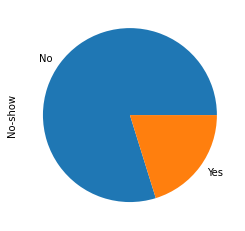

In [32]:
data['No-show'].value_counts().plot(kind='pie')

> The above chart shows that a larger number of patient showed up for their appointment while a lesser number did not show up

#### What is the proportion of Gender with regards to showing up for appointment?


Text(0.5, 1.0, 'Visual of Gender with respect to Showing Up for appointment')

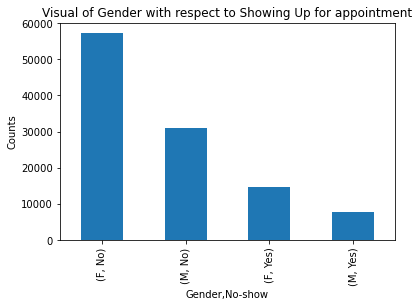

In [33]:
#Bar plot showing the proportion of Gender with respect to No-show

data[['Gender','No-show']].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.title('Visual of Gender with respect to Showing Up for appointment')

In [34]:
data[['Gender','No-show']].value_counts()

Gender  No-show
F       No         57245
M       No         30962
F       Yes        14594
M       Yes         7725
dtype: int64

In [35]:
#getting the values for gender with respect to showing up or not

y10 = sum((data['Gender'] == 'F') & (data['No-show'] == 'No'))
y11 = sum((data['Gender'] == 'F') & (data['No-show'] == 'Yes'))
y20 = sum((data['Gender'] == 'M') & (data['No-show'] == 'No'))
y21 = sum((data['Gender'] == 'M') & (data['No-show'] == 'Yes'))

In [36]:
#storing the distinct value into a variable

x = list(data['Gender'].unique())
y1 = [y10, y11]
y2 = [y20, y21]

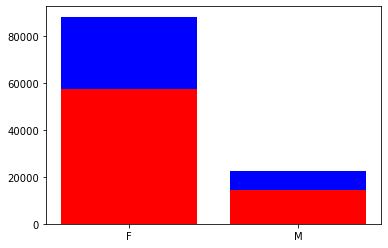

In [37]:
#A stacked plot of Gender with respect to showing for an appointment or not

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

> The above plot shows that patient who showed up for appointment the most were female followed by male  while male who dont show up for their appointment were lesser than the female patient who dont show up for their appointment

#### The highest number of Neighborhood with respect to showing up for appointment or not?

Text(0.5, 1.0, 'Plot of first 20 Neighborhoods ranking with respect to No-show')

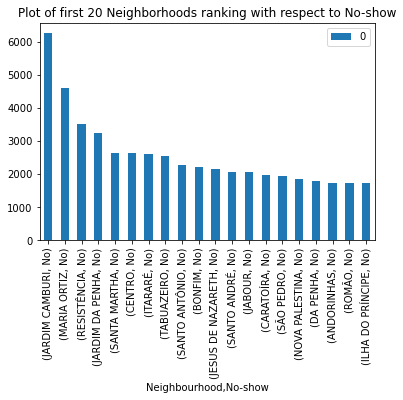

In [38]:
pd.DataFrame(data[['Neighbourhood','No-show']].value_counts()).head(20).plot(kind='bar')
plt.title('Plot of first 20 Neighborhoods ranking with respect to No-show')

> Jardim camburi was the highest neighborhood with patient who show for their appointment followed by Maria Ortiz, Andorinhas, Ramao, and Ilha Do Principe seems to have close number of patient that showed up for appointment

#### The least number of Neighborhood with respect to showing up for appointment or not

<AxesSubplot:xlabel='Neighbourhood,No-show'>

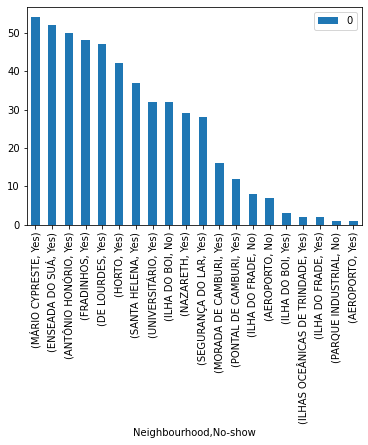

In [39]:
pd.DataFrame(data[['Neighbourhood','No-show']].value_counts()).tail(20).plot(kind='bar')

> Aeroporto happens to be the neigborhood with the lowest number of patient that didnt show up for appointment, while Parque Industrial happens to be the neighborhood with the lowest number of patient that showed for appointment

#### Which Neighborhood has the highest number of patients?

<AxesSubplot:>

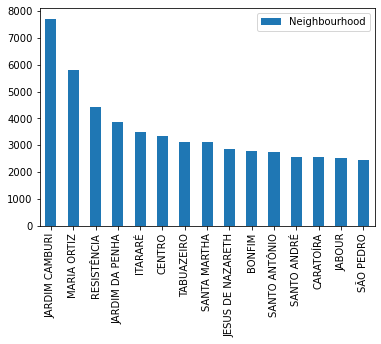

In [40]:
#Top fifteen Neighbourhood with patients

pd.DataFrame(data['Neighbourhood'].value_counts()).head(15).plot(kind='bar')

> Jardim Camburi happens to be the neighborhood with the highest number of patient, followed by Maria Ortiz, Resistencia, Jardim Da Penha, and so on with Sao Pedro being the fifteen Neighbourhood with the highest number of patients

#### Which Neighborhood has the least number of patients?

<AxesSubplot:>

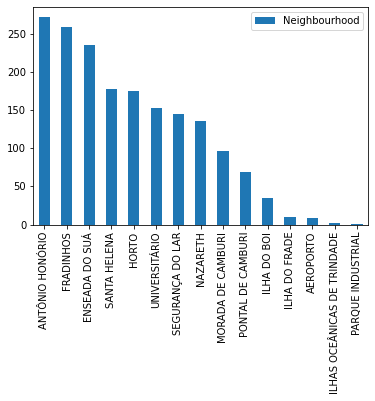

In [41]:
#Bottom fifteen Neighborhood with the least number of patient

pd.DataFrame(data['Neighbourhood'].value_counts()).tail(15).plot(kind='bar')

> Parque Industrial happens to be the Neighborhood with the lowest number of patients, followed by Ilhas Oceanicas De Trindade

#### What day of the week do patient Schedule appointment the most?

<AxesSubplot:>

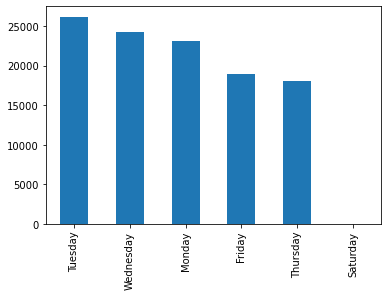

In [42]:
data['Schedule_weekday'].value_counts().plot(kind='bar')

> The above plot shows that patients set up appointment the most on Tuesday, followed by on Wednesday, then on Monday.
> It also show that patient least set up appointments on Saturday

#### What day of the week do patient have appointment the most?

<AxesSubplot:>

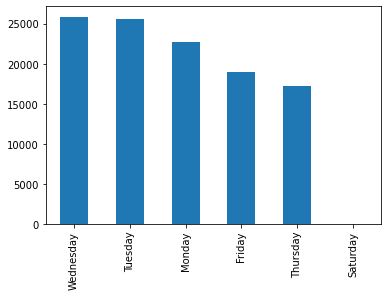

In [43]:
data['Appointment_weekday'].value_counts().plot(kind='bar')

> It shows that patients do have appointments the most on Wednesday, followed by Tuesday, while on Saturdays, patients least have appointment

#### what is the relationship between the day a patient schedules an appointment and showing up for appointment or not?

<AxesSubplot:xlabel='Schedule_weekday,No-show'>

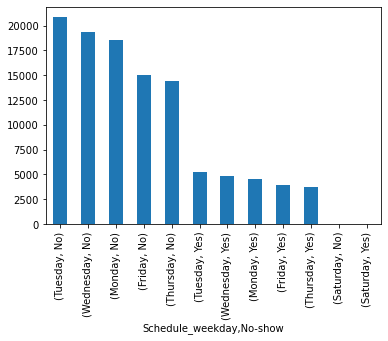

In [44]:
data[['Schedule_weekday', 'No-show']].value_counts().plot(kind='bar')

> The above visual shows that Patients who set up their appointment on Tuesdays show up the most for appointment

#### what is the relationship between the day a patient has an appointment and showing up for it or not?

<AxesSubplot:xlabel='Appointment_weekday,No-show'>

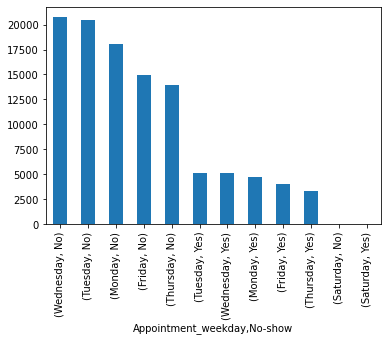

In [45]:
data[['Appointment_weekday', 'No-show']].value_counts().plot(kind='bar')

> It was observed that patients whose appointment day are on wednesdays tends to show up the most for appointment

#### which day do people who don't show up for appointment have an appointment?

<AxesSubplot:>

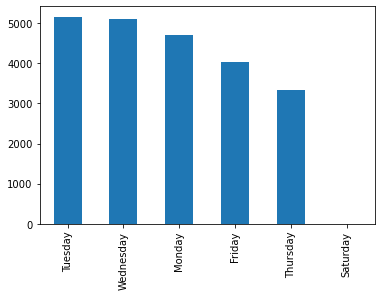

In [46]:
data[data['No-show'] == 'Yes']['Appointment_weekday'].value_counts().plot(kind='bar')

#### which day do people who show up for appointment have an appointment

<AxesSubplot:>

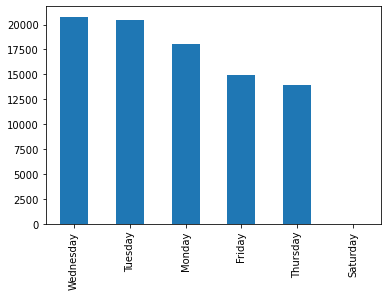

In [47]:
data[data['No-show'] == 'No']['Appointment_weekday'].value_counts().plot(kind='bar')

#### which day do patient who don't show up for appointment scheduled the appointment?

<AxesSubplot:>

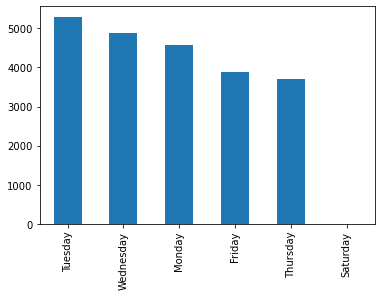

In [48]:
data[data['No-show'] == 'Yes']['Schedule_weekday'].value_counts().plot(kind='bar')

#### which day do patient who show up for appointment scheduled the appointment?

<AxesSubplot:>

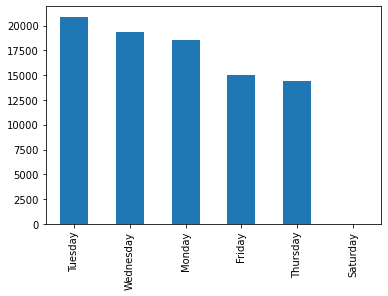

In [49]:
data[data['No-show'] == 'No']['Schedule_weekday'].value_counts().plot(kind='bar')

#### is there any relationship between patients who are enrolled in Brasilian welfare program "Bolsa Família" and Showing up for appointment

<AxesSubplot:>

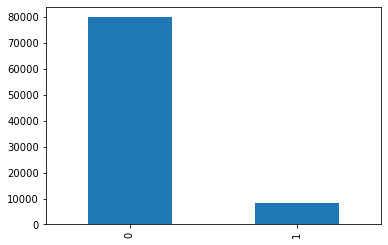

In [50]:
data[data['No-show'] == 'No']['Scholarship'].value_counts().plot(kind='bar')

> The chart shows that patients who are not enrolled in Brasilian welfare program show up the most for appointment

<AxesSubplot:>

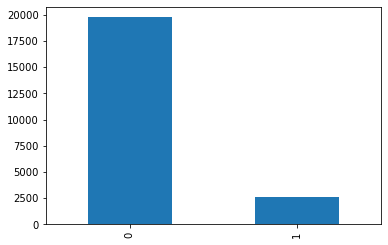

In [51]:
data[data['No-show'] == 'Yes']['Scholarship'].value_counts().plot(kind='bar')

> The chart shows that patients who are not enrolled in Brasilian welfare program don't show up for appointment compared to those enrolled in Brasilian welfare program

#### What age group has the highest number of patient?

<AxesSubplot:>

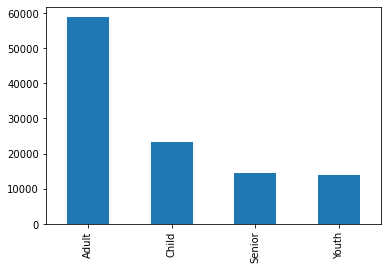

In [52]:
data['Age_Group'].value_counts().plot(kind='bar')

> The above plot shows that the adult age group(25-64years) have the highest number of patients followed by the children age grpup(0-14years) followed by the senior age group(65years and above) then the youth age group(15-24years)

#### What age group has the highest number of patient that do not show up for appointment?

<AxesSubplot:>

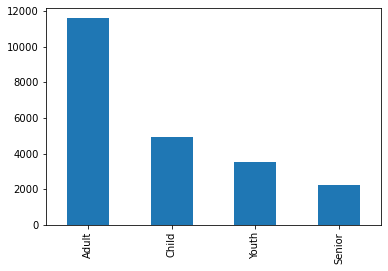

In [53]:
data[data['No-show'] == 'Yes']['Age_Group'].value_counts().plot(kind='bar')

> It shows that the adult age group has the highest number of patients that do not show up for appointment, followed by the children age group, then youth age group, with the senior age group having the least number of patients that do not show up for appointment

#### What age group has the highest number of patient that show up for appointment?

<AxesSubplot:>

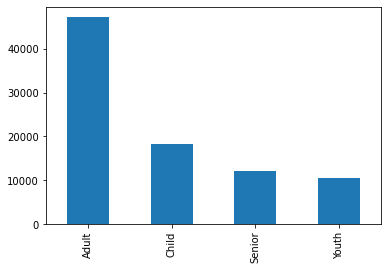

In [54]:
data[data['No-show'] == 'No']['Age_Group'].value_counts().plot(kind='bar')

<a id='conclusions'></a>
## Conclusions


###### For us to know if a patient would show for an appointment, there are certain features that needs to be put into  consideration, such as: the patient Age Group, the Neighborhood, the day the patient set up the appointment, and also the day for the appointment

###### Hence, we can conclude that if a patient is from Jardim Camburi Neighborhood, there is a high chance that he/she would show up if the appointment is scheduled for maybe Wednesday or Tuesday if the patient is within the age 25-64years

# Limitations

##### The name of the hospital where the patients scheduled appointment and what type of hospital it was (whether private or government).


##### Also the Name of the doctor on duty during the day of scheduling could have given more insight to reason why patients show up or not

##### Also there was not variable description of the Handcap column which made it of no use to predicting if it has an effect to showing up of patient or not